<center><img src="C:\Users\IN_CAP02\Desktop\Presentación\Imagen.png" width: "400" height="200"/></center>

# RIESGO CREDITICIO (Credit Risk)  
## *Modelado en R*

## Introducción

<center><img src="C:\Users\IN_CAP02\Desktop\Presentación\Imagen1.png" width: "400" height="200"/></center>

### Definición:  

"Es la posibilidad de pérdida debido al incumplimiento del prestatario o la contraparte en operaciones directas, indirectas o de derivados que conlleva el no pago, el pago parcial o la falta de oportunidad en el pago de las obligaciones pactadas.” 


### Componentes de la Pérdida Esperada: 
- Probabilidad de incumplimiento (PD)
- Exposición de incumplimiento (EAD)
- Pérdida dado el incumplimiento (LGD)  


\begin{align}
EL & = PD x EAD x LGD
\end{align}

### Información utilizada por los bancos

- De aplicación:
    - Ingresos
    - Estado Civil 
    - Edad

- De comportamiento: 
    - Saldo de cuenta corriente
    - Pagos atrasados en el historial de la cuenta 
    

## Base de Datos

Antes de entrar en cualquier análisis sofisticado, el primer paso es hacer un Análisis exploratorio de Data (EDA) y limpiar los datos. Con el fin de poder generar tablas apropiadas y estadísticas resumidas.

## Información de Aplicación: 


In [27]:
library(readxl)
A1 <- read_excel("~/Documents/Programa de estudios superiores/Programacion II/Presentación/Apendice.xlsx", 
    sheet = "Aplicacion")
A1

Propósito del crédito,Puntuación
Carro nuevo,1
Carro usado,2
Mobiliaria y Equipo,3
Tecnología,4
Electrodomésticos,5
Reparaciones,6
Educación,7
Vacaciones,8
Capacitación,9
Negocios,10


## Información de Comportamiento

In [28]:
library(readxl)
A2 <- read_excel("~/Documents/Programa de estudios superiores/Programacion II/Presentación/Apendice.xlsx", 
    sheet = "Comportamiento")
A2

Pago de préstamos anteriores,Puntuación
No existen prestamos anteriores,2
Créditos pagados (en este banco),4
No existe mora con créditos actuales (en este banco),3
Pagos pendientes de créditos anteriores,0
Cuenta corriente problemática,1
Saldo de Cuenta Corriente,Puntuación
No existe saldo o debitos,2
0 <= x < 200,3
>= 200,4
No posee cuenta,1


## Resultado

In [32]:
library(readxl)
A3 <- read_excel("~/Documents/Programa de estudios superiores/Programacion II/Presentación/Apendice.xlsx", 
    sheet = "Resultado")
A3

Credibilidad,Resultado
Bueno (Apto para crédito),1
Malo (No apto para crédito),0


## Arboles de decisión 

Un método muy utilizado para clasificar a los posibles deudores como buenos o malos, con el fin de evitar el Riesgo de Crédito, es el de un árbol de decisiones. La principal razon por la cual son utilizados, es por su fácil interpretación.  

### Ejemplo

<center><img src="C:\Users\IN_CAP02\Desktop\Presentación\Imagen2.png" width: "400" height="200"/></center>

### Tipos de arbol de decision 

<center><img src="C:\Users\IN_CAP02\Desktop\Presentación\Imagen6.png" width: "400" height="200"/></center>

## Paso 1: 
Importar datos y limpiar.  
Crear set de Entrenamiento y Test.

<center><img src="C:\Users\IN_CAP02\Desktop\Presentación\Imagen3.png" width: "400" height="200"/></center>

## Paso 2: 
Crear algoritmo de Árbol de Decision.  
Se crea el arbol de decision usando los datos de Entrenamiento.

<center><img src="C:\Users\IN_CAP02\Desktop\Presentación\Imagen4.png" width: "400" height="200"/></center>

## Paso 3: 
Medir precisión del Árbol.  
Con las reglas creadas en el árbol, se aplican a los datos de TEST para realizar predicción y medir precisión del árbol.

<center><img src="C:\Users\IN_CAP02\Desktop\Presentación\Imagen5.png" width: "400" height="200"/></center>

## Paso 4:
Graficar Arbol de Decisión.

### Arbol de clasificacion (Variable dependiente cualitativa)

## Paquete:
install.packages("tree")

#### Libreria

library(tree)

In [15]:
#install.packages("tree")
library(tree)

In [16]:
#Leer la informacion del CSV
german_credit = read.csv("C:/Users/Mafer/Documents/PROYECTO/BD 2/german_credit.csv", header = TRUE, sep = ",")
dim(german_credit)

[1] 1000   21

In [19]:
#Creando set de entrenamiento y test
indexes = sample(1:nrow(german_credit), size=0.8*nrow(german_credit)) # Muestra aleatoria de 80% 
Train80 = german_credit[indexes,] # Entrenamiento
dim(Train80)
Test20 = german_credit[-indexes,] # Test
dim(Test20)

[1] 800  21

[1] 200  21


Classification tree:
tree(formula = as.factor(Credibilidad) ~ SCC + DP + PPA + PC + 
    MC + VAA + AEL + PDI + ECS + COF + VMR + AMV + Edad + CA + 
    TA + NCA + Ocupacion + NPC + Tel, data = Train50, method = "class")
Variables actually used in tree construction:
[1] "SCC" "DP"  "AMV" "PPA" "MC"  "VAA" "PC"  "AEL"
Number of terminal nodes:  13 
Residual mean deviance:  0.9336 = 734.7 / 787 
Misclassification error rate: 0.2013 = 161 / 800 

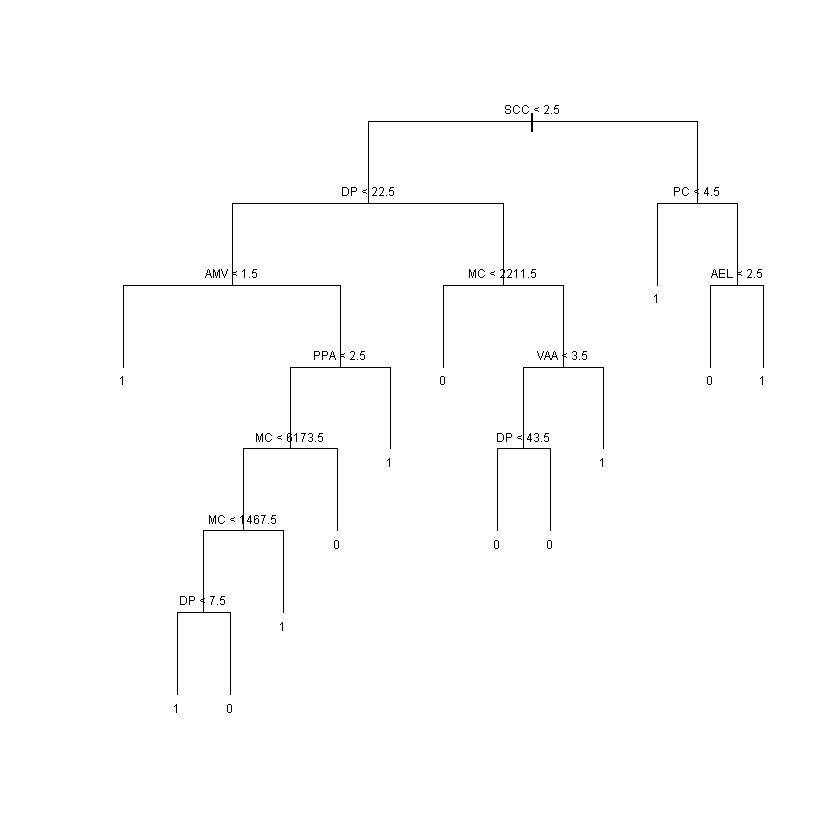

In [20]:
#CREANDO ARBOL
Train80_tree = tree(as.factor(Credibilidad) ~ SCC+DP+PPA+PC+MC+VAA+AEL+PDI+ECS+COF+VMR+AMV+Edad+CA+TA+NCA+Ocupacion+NPC+Tel, data=Train50, method="class")
summary(Train80_tree)
plot(Train80_tree, type= "uniform")
text(Train80_tree, pretty=0,cex=0.6)

<center><img src="C:\Users\IN_CAP02\Desktop\Presentación\Imagen7.png" width: "400" height="50"/></center>

In [22]:
# Prediccion con los datos de test.

Test20_pred = predict(Train80_tree, Test20, type="class")

MC1 = table(Test20_pred, Test20$Credibilidad)
acierto1<-(sum(diag(MC1))/sum(MC1))*100
print(paste('La exactitud de la prediccion es: ', acierto1))

error1 = 100-acierto1
print(paste('El error de la prediccion es: ', error1))

Train80_prune8 <- prune.misclass(Train80_tree, best=8)

Test20_prune8_pred <- predict(Train80_prune8, Test20, type="class")

MC = table(Test20$Credibilidad,Test20_prune8_pred)
MC
acierto<-(sum(diag(MC))/sum(MC))*100
print(paste('La exactitud de la prediccion es: ', acierto))

error = 100-acierto
print(paste('El error de la prediccion es: ', error))

[1] "La exactitud de la prediccion es:  77"
[1] "El error de la prediccion es:  23"


   Test20_prune8_pred
      0   1
  0  39  21
  1  22 118

[1] "La exactitud de la prediccion es:  78.5"
[1] "El error de la prediccion es:  21.5"


## Paquete:
install.packages("rpart")  
install.packages("rpart.plot")

#### Libreria

library(rpart)  
library(rpart.plot)

In [2]:
install.packages("rpart")  
install.packages("rpart.plot")

Installing package into 'C:/Users/Mafer/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'rpart' is in use and will not be installed"Installing package into 'C:/Users/Mafer/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'rpart.plot' is in use and will not be installed"

In [3]:
#Llamando a las librerias 
library(rpart)  
library(rpart.plot)

In [10]:
#leer la informacion del CSV
german_credit = read.csv("C:/Users/Mafer/Documents/PROYECTO/BD 2/german_credit.csv", header = TRUE, sep = ",")
str(german_credit)
dim(german_credit)

'data.frame':	1000 obs. of  21 variables:
 $ Credibilidad: int  1 1 1 1 1 1 1 1 1 1 ...
 $ SCC         : int  1 1 2 1 1 1 1 1 4 2 ...
 $ DP          : int  18 9 12 12 12 10 8 6 18 24 ...
 $ PPA         : int  4 4 2 4 4 4 4 4 4 2 ...
 $ PC          : int  2 0 9 0 0 0 0 0 3 3 ...
 $ MC          : int  1049 2799 841 2122 2171 2241 3398 1361 1098 3758 ...
 $ VAA         : int  1 1 2 1 1 1 1 1 1 3 ...
 $ AEL         : int  2 3 4 3 3 2 4 2 1 1 ...
 $ PDI         : int  4 2 2 3 4 1 1 2 4 1 ...
 $ ECS         : int  2 3 2 3 3 3 3 3 2 2 ...
 $ COF         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ VMR         : int  4 2 4 2 4 3 4 4 4 4 ...
 $ AMV         : int  2 1 1 1 2 1 1 1 3 4 ...
 $ Edad        : int  21 36 23 39 38 48 39 40 65 23 ...
 $ CA          : int  3 3 3 3 1 3 3 3 3 3 ...
 $ TA          : int  1 1 1 1 2 1 2 2 2 1 ...
 $ NCA         : int  1 2 1 2 2 2 2 1 2 1 ...
 $ Ocupacion   : int  3 3 2 2 2 2 2 2 1 1 ...
 $ NPC         : int  1 2 1 2 1 2 1 2 1 1 ...
 $ Tel         : int  1 1 1 1 1 1 1 1 

[1] 1000   21

In [28]:
indexes = sample(1:nrow(g2), size=0.80*nrow(g2)) # Muestra aleatoria de 80% 
Train80 = german_credit[indexes,] # Entrenamiento
dim(Train80)
Test20 = german_credit[-indexes,] # Test
dim(Test20)

[1] 800  21

[1] 200  21

In [29]:
prop.table(table(Train80$Credibilidad))
prop.table(table(Test20$Credibilidad))


  0   1 
0.3 0.7 


  0   1 
0.3 0.7 

   predict_unseen
      0   1
  0  28  32
  1  25 115

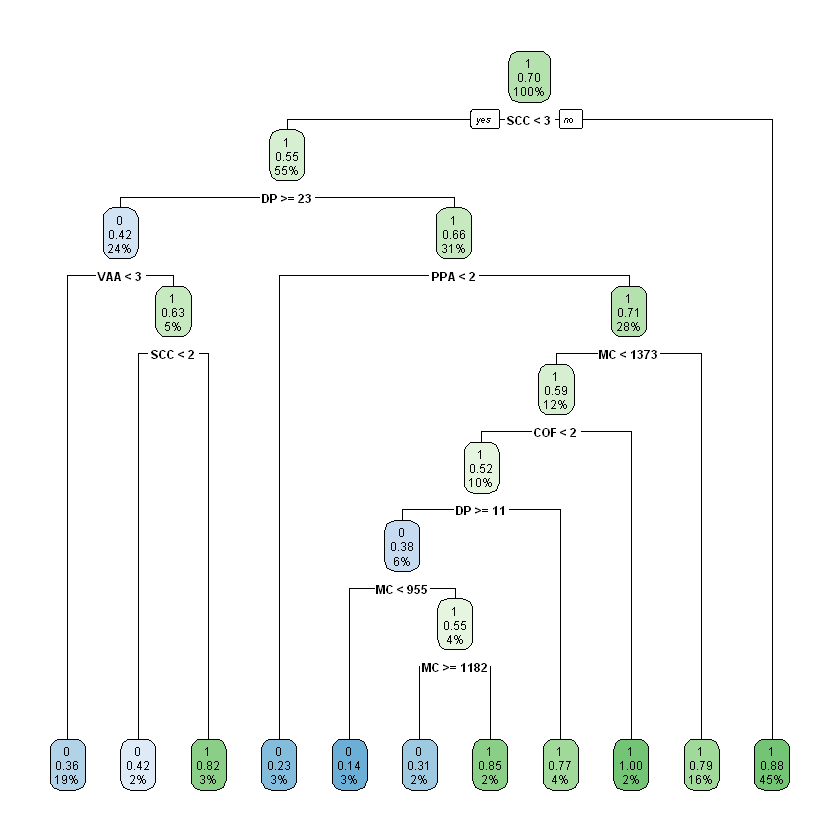

In [30]:
fit <- rpart(Credibilidad~., data = Train80, method = 'class')
rpart.plot(fit,tweak=1.2, extra = 106)
predict_unseen <-predict(fit, Test20, type = 'class')
table_mat <- table(Test20$Credibilidad, predict_unseen)
table_mat

<center><img src="C:\Users\IN_CAP02\Desktop\Presentación\Imagen8.png" width: "400" height="50"/></center>

In [31]:
# Matriz de confusion 

accuracy_Test <- sum(diag(table_mat)) / sum(table_mat)
print(paste('Exactitud del test: ', accuracy_Test))

[1] "Exactitud del test:  0.715"



Classification tree:
rpart(formula = Credibilidad ~ ., data = Train80, method = "class")

Variables actually used in tree construction:
[1] COF DP  MC  PPA SCC VAA

Root node error: 240/800 = 0.3

n= 800 

        CP nsplit rel error  xerror     xstd
1 0.068750      0   1.00000 1.00000 0.054006
2 0.050000      2   0.86250 0.95417 0.053270
3 0.045833      3   0.81250 0.90833 0.052473
4 0.016667      4   0.76667 0.85417 0.051449
5 0.012500      9   0.67917 0.84167 0.051200
6 0.010000     10   0.66667 0.83333 0.051031


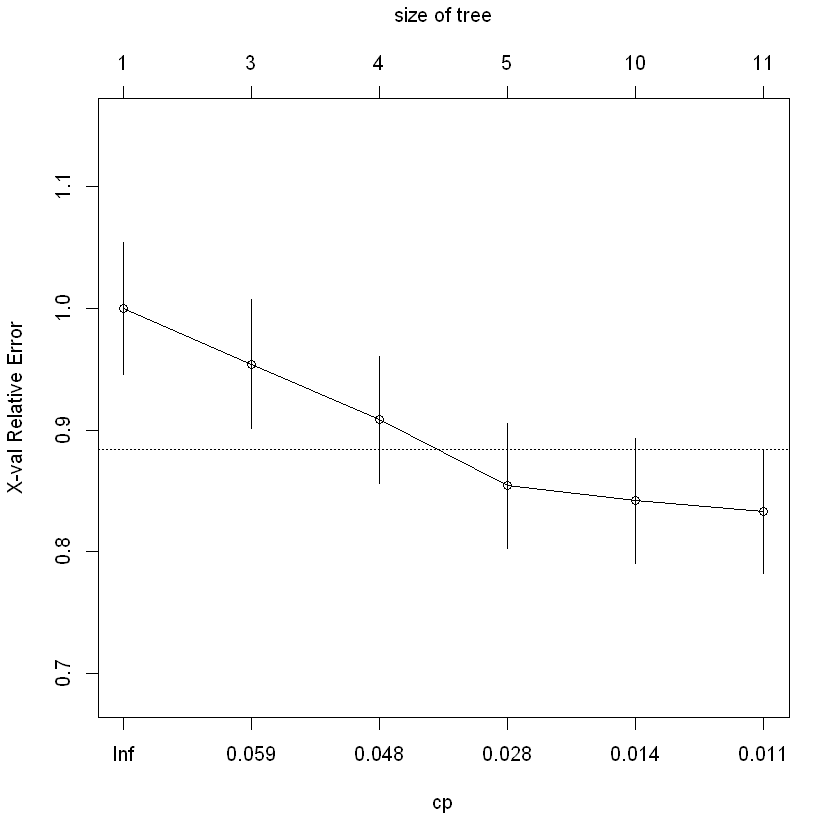

In [32]:
# Examinando la complejidad del plot 

printcp(fit)
plotcp(fit)

In [33]:
# Funcion de la certeza del modelo 
accuracy_tune <- function(fit) {
  predict_unseen <- predict(fit, Test20, type = 'class')
  table_mat <- table(Test20$Credibilidad, predict_unseen)
  accuracy_Test <- sum(diag(table_mat)) / sum(table_mat)
  accuracy_Test
}

In [34]:
# Llamando a la funcion 
control <- rpart.control(minsplit = 4,
                         minbucket = round(5 / 3),
                         maxdepth = 3,
                         cp = 0)
tune_fit <- rpart(Credibilidad~., data = Train80, method = 'class', control = control)
accuracy_tune(tune_fit)

[1] 0.73

# GRACIAS 